### Importação dos dados



In [5]:
import pandas as pd

# URLs das lojas
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Dataframe das lojas
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [29]:
# faturamento das lojas
faturamento_loja = loja['Preço'].sum().item()
faturamento_loja2 = loja2['Preço'].sum().item()
faturamento_loja3 = loja3['Preço'].sum().item()
faturamento_loja4 = loja4['Preço'].sum().item()

# imprimir na tela
print(f'O Faturamento da loja 1 é: R$ {faturamento_loja:,.2f}')
print(f'O Faturamento da loja 2 é: R$ {faturamento_loja2:,.2f}')
print(f'O Faturamento da loja 3 é: R$ {faturamento_loja3:,.2f}')
print(f'O Faturamento da loja 4 é: R$ {faturamento_loja4:,.2f}')

# total
total_faturamento = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]
resultado = sum(total_faturamento)
print(f'\nO faturamento total é: R$ {resultado:,.2f}')

O Faturamento da loja 1 é: R$ 1,534,509.12
O Faturamento da loja 2 é: R$ 1,488,459.06
O Faturamento da loja 3 é: R$ 1,464,025.03
O Faturamento da loja 4 é: R$ 1,384,497.58

O faturamento total é: R$ 5,871,490.79


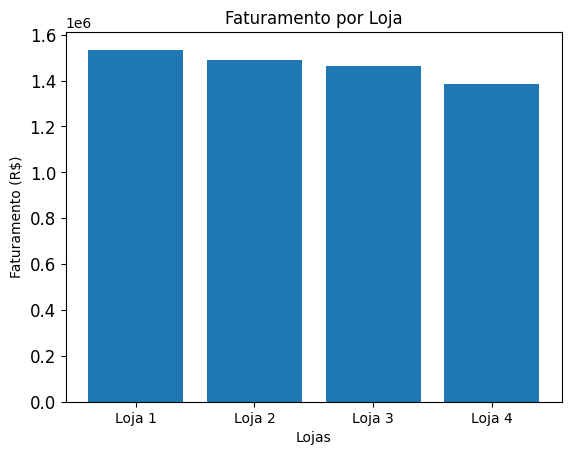

In [7]:
import matplotlib.pyplot as plt

# Definindo os dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criando o gráfico de barras
plt.bar(lojas, faturamentos)

plt.xticks(fontsize=10)  # Ajusta o tamanho da fonte dos rótulos do eixo x (lojas)
plt.yticks(fontsize=12)  # Ajusta o tamanho da fonte dos rótulos do eixo y (faturamento)

# Adicionando título e rótulos aos eixos
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')

# Exibindo o gráfico
plt.show()

# 2. Vendas por Categoria


In [4]:
vendas_por_categoria_por_loja = loja['Categoria do Produto'].value_counts()
vendas_por_categoria_por_loja2 = loja2['Categoria do Produto'].value_counts()
vendas_por_categoria_por_loja3 = loja3['Categoria do Produto'].value_counts()
vendas_por_categoria_por_loja4 = loja4['Categoria do Produto'].value_counts()

print(f'\n Loja 1: ')
print(vendas_por_categoria_por_loja)

print(f'\n Loja 2: ')
print(vendas_por_categoria_por_loja2)

print(f'\n Loja 3: ')
print(vendas_por_categoria_por_loja3)

print(f'\n Loja 4: ')
print(vendas_por_categoria_por_loja4)



 Loja 1: 
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

 Loja 2: 
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

 Loja 3: 
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

 Loja 4: 
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e l

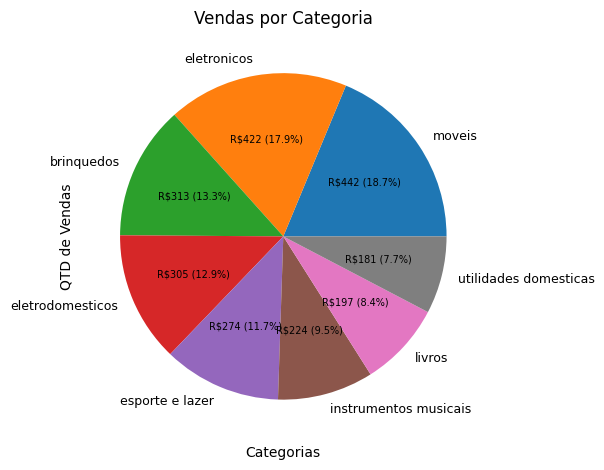

In [5]:
import matplotlib.pyplot as plt

# Definindo os dados para a loja
categorias_loja2 = vendas_por_categoria_por_loja2.index.tolist()
valores_loja2 = vendas_por_categoria_por_loja2.values.tolist()

def formatar_valor(pct, valores):
  valor_absoluto = int(pct/100.*sum(valores))
  return "R${:,.0f} ({:.1f}%)".format(valor_absoluto, pct)

# Criando o gráfico de pizza para a loja 2
wedges, texts, autotexts = plt.pie(valores_loja2, labels=categorias_loja2, autopct=lambda pct: formatar_valor(pct, valores_loja2))

# Adicionando título e rótulos aos eixos
plt.title('Vendas por Categoria')

# Ajustando o tamanho da fonte dos textos dentro das fatias
for text in texts:
    text.set_fontsize(9)

# Ajustando o tamanho da fonte das porcentagens dentro das fatias
for autotext in autotexts:
    autotext.set_fontsize(7)

plt.xlabel('Categorias')
plt.ylabel('QTD de Vendas', fontsize=10)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
# selecionando os elementos da coluna (loja) localizados no DF. assim, conseguimos realizar a media (mean)
feedback_loja = loja["Avaliação da compra"].mean()
feedback_loja2 = loja2["Avaliação da compra"].mean()
feedback_loja3 = loja3["Avaliação da compra"].mean()
feedback_loja4 = loja4["Avaliação da compra"].mean()

# imprimindo na tela a mensagem
print(f'A Média de avaliação da loja1 é: {round(feedback_loja, 2)}')
print(f'A Média de avaliação da loja2 é: {round(feedback_loja2, 2)}')
print(f'A Média de avaliação da loja3 é: {round(feedback_loja3, 2)}')
print(f'A Média de avaliação da loja4 é: {round(feedback_loja4, 2)}')


A Média de avaliação da loja1 é: 3.98
A Média de avaliação da loja2 é: 4.04
A Média de avaliação da loja3 é: 4.05
A Média de avaliação da loja4 é: 4.0


# 4. Produtos Mais e Menos Vendidos

In [ ]:
# seleciona a (loja) no dataframe realizando contagem da quantidade (value counts)
produto_m1 = loja["Produto"].value_counts()
produto_m2 = loja2["Produto"].value_counts()
produto_m3 = loja3["Produto"].value_counts()
produto_m4 = loja4["Produto"].value_counts()

# imprimindo os valores na tela
saida = f"""
Loja 1 - O produto mais vendido: "{produto_m1.index[0]}", e o produto menos vendido: "{produto_m1.index[-1]}"
Loja 2 - O produto mais vendido: "{produto_m2.index[0]}", e o produto menos vendido: "{produto_m2.index[-1]}"
Loja 3 - O produto mais vendido: "{produto_m3.index[0]}", e o produto menos vendido: "{produto_m3.index[-1]}"
Loja 4 - O produto mais vendido: "{produto_m4.index[0]}", e o produto menos vendido: "{produto_m4.index[-1]}"
"""
print(saida)



Loja 1 - O produto mais vendido: "Micro-ondas", e o produto menos vendido: "Celular ABXY"
Loja 2 - O produto mais vendido: "Iniciando em programação", e o produto menos vendido: "Jogo de tabuleiro"
Loja 3 - O produto mais vendido: "Kit banquetas", e o produto menos vendido: "Blocos de montar"
Loja 4 - O produto mais vendido: "Cama box", e o produto menos vendido: "Guitarra"



# 5. Frete Médio por Loja


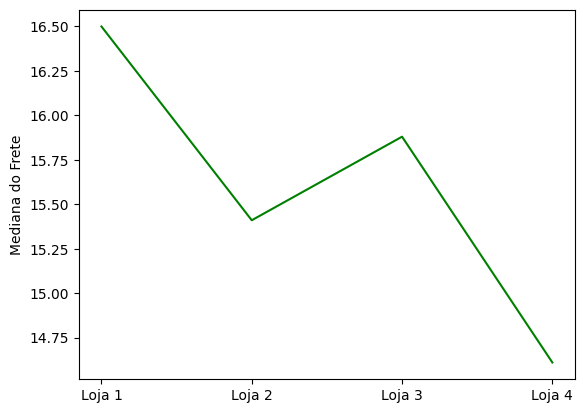


Frete Mediano
Loja 1 - 16.5
Loja 2 - 15.41
Loja 3 - 15.88
Loja 4 - 14.61



In [ ]:
frete1 = loja["Frete"].median()
frete2 = loja2["Frete"].median()
frete3 = loja3["Frete"].median()
frete4 = loja4["Frete"].median()

# imprimindo os valores na tela
resultado = f"""
Frete Mediano
Loja 1 - {round(frete1, 2)}
Loja 2 - {round(frete2, 2)}
Loja 3 - {round(frete3, 2)}
Loja 4 - {round(frete4, 2)}
"""

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
valores = [round(frete1, 2), round(frete2, 2), round(frete3, 2), round(frete4, 2)]

# adicionando cor ao gráfico
plt.plot(lojas, valores, color='green')  # 'green' pode ser substituído por outras cores ou códigos de cores hexadecimais

plt.ylabel('Mediana do Frete')
plt.show()

print(resultado)